In [ ]:
from google.colab import drive
drive.mount('/drive')

In [ ]:
!pip install category_encoders

In [ ]:
import sys
sys.path.insert(0,'/drive/My Drive/TP_Datos_2C2021/parte_2/')

In [ ]:
from preprocessing import *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

plt.rcParams['figure.dpi'] = 70

# seteando tipo de grid en seaborn
sns.set_theme(style='ticks', palette=None, font_scale=.9) 

#filtrado de warnings
warnings.filterwarnings('ignore')

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
hamburguesas_values, hamburguesas_target, hamburguesas_test = descargar_datasets(
    url_values = 'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs',
    url_target = 'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs', 
    url_test = 'https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8'
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    hamburguesas_values, 
    hamburguesas_target, 
    test_size=0.4,
    random_state=66, 
    stratify=hamburguesas_target.llovieron_hamburguesas_al_dia_siguiente.astype(str)
)

In [ ]:
X_val_dev, X_test_holdout, y_val_dev, y_test_holdout = train_test_split(
    X_test, 
    y_test, 
    test_size=0.1,
    random_state=66, 
    stratify=y_test.llovieron_hamburguesas_al_dia_siguiente.astype(str)
)

In [ ]:
#hamburguesas_values_sn, hamburguesas_val_dev_sn, hamburguesas_hold_out_sn = knn_imputer(X_train, X_val_dev, X_holdout)
#hamburguesas_val_dev_sn = knn_imputer(X_val_dev)
#hamburguesas_test_sn = knn_imputer(hamburguesas_test)

In [ ]:
#hamburguesas_values_escalado = standar_scaler(hamburguesas_values_sn)
#hamburguesas_val_dev_escalado = standar_scaler(hamburguesas_val_dev_sn)
#hamburguesas_test_escalado = standar_scaler(hamburguesas_test_sn)

# Knn imputer, robust scaler, one hot encoding y hashing trick

In [ ]:
hamburguesas_train_values_ht, hamburguesas_val_dev_values_ht, X_test_holdout_sn = preprocessing_knn_imputer_robust_escaler_one_hot_encoding_hashing_trick(
    X_train, 
    X_val_dev, 
    X_test_holdout
)

#hamburguesas_train_values_ht = hashing_trick_ecoding(hamburguesas_values_escalado)
hamburguesas_train_target_enc = y_train['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})
#hamburguesas_val_dev_values_ht = hashing_trick_ecoding(hamburguesas_val_dev_escalado)
hamburguesas_val_dev_target_enc = y_val_dev['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})

## Selección de features

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* https://scikit-learn.org/stable/modules/ensemble.html
* https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
* https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [ ]:
modelo = XGBClassifier()
modelo.fit(hamburguesas_train_values_ht, hamburguesas_train_target_enc)

[12:12:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
importancia = []
for i in range (len(modelo.feature_importances_)):
  importancia.append((modelo.feature_importances_[i], hamburguesas_train_values_ht.columns[i]))

In [ ]:
importancia.sort(reverse=True)
importancia

[(0.17083405, 'humedad_tarde'),
 (0.04413148, 'rafaga_viento_max_velocidad'),
 (0.039118126, 'nubosidad_tarde'),
 (0.03154117, 'mm_lluvia_dia'),
 (0.023683134, 'presion_atmosferica_tarde'),
 (0.02183488, 'horas_de_sol'),
 (0.016706496, 'mes'),
 (0.016226994, 'presion_atmosferica_temprano'),
 (0.015455248, 'direccion_viento_temprano_Sursureste'),
 (0.014866387, 'direccion_viento_tarde_Oeste'),
 (0.01435606, 'temperatura_temprano'),
 (0.0143351145, 'humedad_temprano'),
 (0.014222059, 'velocidad_viendo_tarde'),
 (0.0133938445, 'rafaga_viento_max_direccion_Este'),
 (0.013358506, 'rafaga_viento_max_direccion_Noreste'),
 (0.013235049, 'rafaga_viento_max_direccion_Noroeste'),
 (0.013003576, 'rafaga_viento_max_direccion_Suroeste'),
 (0.012690766, 'temp_max'),
 (0.012689785, 'temperatura_tarde'),
 (0.012640199, 'temp_min'),
 (0.012622951, 'direccion_viento_temprano_Sureste'),
 (0.012353858, 'velocidad_viendo_temprano'),
 (0.012275311, 'direccion_viento_tarde_Estenoreste'),
 (0.011894239, 'mm_ev

In [ ]:
aux = importancia[:9] #puede variar
columnas_a_usar = []
for tupla in aux:
  columnas_a_usar.append(tupla[1])

Esto es para KNN ya que ese modelo no es lo suficientemente inteligente para saber a qué columnas le debe dar más imporatancia

In [ ]:
columnas_a_usar

['humedad_tarde',
 'rafaga_viento_max_velocidad',
 'nubosidad_tarde',
 'mm_lluvia_dia',
 'presion_atmosferica_tarde',
 'horas_de_sol',
 'mes',
 'presion_atmosferica_temprano',
 'direccion_viento_temprano_Sursureste']

## Búsqueda de hiperparámetros

In [ ]:
modelo = XGBClassifier()

n_estimators = [50, 80]
max_depth = [7,10]
min_samples_split = [200, 250]
min_samples_leaf = [30, 50]
max_features = [7, 15]
learning_rate = [0.01, 0.1, 0.5]

XGB_hyperparameters = dict(n_estimators=n_estimators,
                            max_depth=max_depth,
                            learning_rate=learning_rate,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features)

In [ ]:
XGB_hyperparameters

In [ ]:
xgbsearch = GridSearchCV(estimator=modelo, param_grid=XGB_hyperparameters, cv=5, verbose=4, scoring='roc_auc')
xgbsearch.fit(hamburguesas_train_values_ht, hamburguesas_train_target_enc)#eval_metric='roc_auc'

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[12:47:51] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.849 total time=   2.5s
[12:47:54] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not b

[CV 1/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.849 total time=   5.1s
[12:48:30] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.851 total time=   5.5s
[12:48:36] WARNING: ../src/learner

[CV 2/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.851 total time=   2.7s
[12:49:33] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:49:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.851 total time=   2.7s
[12:49:36] WARNING: ../src/learner

[12:50:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.851 total time=   5.1s
[12:50:31] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:50:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 3/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.851 total time=   2.8s
[12:51:15] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:51:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.852 total time=   5.7s
[12:51:21] WARNING: ../src/learn

[CV 4/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.852 total time=   2.5s
[12:52:24] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:52:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.854 total time=   2.5s
[12:52:26] WARNING: ../src/learn

[12:53:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.854 total time=   5.0s
[12:53:16] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:53:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

[CV 5/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.854 total time=   2.7s
[12:54:08] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:54:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.851 total time=   4.2s
[12:54:12] WARNING: ../src/learn

[CV 1/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.854 total time=   6.8s
[12:55:43] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:55:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.856 total time=   7.8s
[12:55:51] WARNING: ../src/learn

[CV 2/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.856 total time=   6.8s
[12:57:23] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:57:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.856 total time=  13.3s
[12:57:36] WARNING: ../src/learn

[CV 3/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.856 total time=  10.3s
[12:59:04] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:59:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.856 total time=  14.6s
[12:59:19] WARNING: ../src/learn

[13:01:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.856 total time=  13.2s
[13:01:13] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:01:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

[CV 4/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.856 total time=  27.0s
[13:02:53] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:02:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.860 total time=  12.9s
[13:03:06] WARNING: ../src/lea

[13:04:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.860 total time=  13.4s
[13:04:32] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:04:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

[CV 5/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.860 total time=  13.6s
[13:05:57] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:05:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.851 total time=   8.3s
[13:06:05] WARNING: ../src/lea

[13:07:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.866 total time=   5.4s
[13:07:29] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:07:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

[CV 1/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.866 total time=   2.7s
[13:08:49] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:08:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.868 total time=   2.7s
[13:08:52] WARNING: ../src/learner.c

[13:09:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.868 total time=   5.1s
[13:09:54] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:09:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

[CV 2/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.868 total time=   2.7s
[13:10:38] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:10:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.865 total time=   3.6s
[13:10:41] WARNING: ../src/learner.c

[13:11:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.865 total time=   5.0s
[13:11:47] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:11:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 3/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.865 total time=   5.5s
[13:12:30] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:12:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.867 total time=   5.5s
[13:12:35] WARNING: ../src/learner

[CV 4/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.867 total time=   2.6s
[13:13:47] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:13:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.869 total time=   2.7s
[13:13:50] WARNING: ../src/learner

[13:14:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.869 total time=   7.9s
[13:14:48] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:14:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.869 total time=   4.9s
[13:15:46] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:15:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.868 total time=  12.9s
[13:15:59] WARNING: ../src/learner

[CV 1/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.868 total time=   7.5s
[13:17:19] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:17:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.869 total time=  12.8s
[13:17:32] WARNING: ../src/learner

[CV 2/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.869 total time=  11.0s
[13:19:06] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:19:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.867 total time=  12.5s
[13:19:19] WARNING: ../src/learner

[CV 3/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.867 total time=   6.3s
[13:20:38] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:20:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.867 total time=  24.6s
[13:21:02] WARNING: ../src/learner

[CV 4/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.867 total time=  11.8s
[13:22:23] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:22:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.870 total time=  12.7s
[13:22:36] WARNING: ../src/learn

[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.870 total time=   9.8s
[13:23:59] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:23:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.866 total time=   8.6s
[13:24:07] WARNING: ../src/learn

[CV 1/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.866 total time=   4.7s
[13:25:30] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:25:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.867 total time=   8.6s
[13:25:38] WARNING: ../src/learn

[CV 2/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.859 total time=   2.6s
[13:27:03] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:27:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.856 total time=   2.6s
[13:27:06] WARNING: ../src/learner.c

[13:28:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.856 total time=   4.7s
[13:28:05] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:28:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

[CV 3/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.856 total time=   2.7s
[13:28:50] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:28:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.858 total time=   4.1s
[13:28:54] WARNING: ../src/learner.c

[13:29:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.858 total time=   4.9s
[13:30:01] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:30:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

[CV 4/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.858 total time=   5.2s
[13:30:42] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:30:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.855 total time=   5.7s
[13:30:48] WARNING: ../src/learner

[13:31:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.855 total time=   4.9s
[13:31:52] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:31:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 5/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.855 total time=   4.9s
[13:32:37] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:32:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.856 total time=   8.0s
[13:32:45] WARNING: ../src/learner

[CV 1/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.856 total time=   3.8s
[13:33:41] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:33:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.857 total time=   4.0s
[13:33:45] WARNING: ../src/learner

[13:34:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.853 total time=  11.5s
[13:34:59] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:34:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 2/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.853 total time=  11.8s
[13:36:14] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:36:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.855 total time=  11.7s
[13:36:26] WARNING: ../src/learner

[13:37:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.855 total time=  12.3s
[13:37:42] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:37:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 3/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.855 total time=   6.2s
[13:39:00] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:39:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.852 total time=   7.8s
[13:39:08] WARNING: ../src/learner

[CV 4/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.852 total time=   6.1s
[13:40:31] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:40:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.853 total time=   6.1s
[13:40:37] WARNING: ../src/learn

[CV 5/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.853 total time=   5.9s
[13:42:04] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:42:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.850 total time=   3.9s
[13:42:07] WARNING: ../src/learn

[13:43:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.850 total time=   7.1s
[13:43:37] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:43:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [ ]:
parametros = xgbsearch.best_params_
parametros

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 30,
 'min_samples_split': 200,
 'n_estimators': 80}

In [ ]:
xgbsearch.best_score_

0.8692978954594415

In [ ]:
parametros = {'learning_rate': 0.1,
              'max_depth': 7,
              'max_features': 7,
              'min_samples_leaf': 30,
              'min_samples_split': 200,
              'n_estimators': 80}

Como ya encontramos los mejores hiperparámetros, creamos un diccionario con dichos valores (esto es para cuando no podamos hacer el `.best_params_` porque no ejecutamos GridSearch cuando usamos el notebook otro día debido al tiempo que insume)

## Entrenamos y vemos cómo nos va

Vemos qué pasa si separamos así nomas al `df_reducido` en 5. Para eso vemos las proporciones:

In [ ]:
modelo = XGBClassifier(**parametros)
modelo.fit(hamburguesas_train_values_ht, hamburguesas_train_target_enc)

[13:48:25] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:48:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, max_features=7, min_child_weight=1,
              min_samples_leaf=30, min_samples_split=200, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [ ]:
prediccion = modelo.predict_proba(hamburguesas_val_dev_values_ht)[:,1]

In [ ]:
roc_auc_score(hamburguesas_val_dev_target_enc, prediccion)

0.8700893215229195

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_ht)

In [ ]:
accuracy_score(hamburguesas_val_dev_target_enc, prediccion)

0.8487814193301984

In [ ]:
recall_score(hamburguesas_val_dev_target_enc, prediccion)

0.5034384892478987

In [ ]:
precision_score(hamburguesas_val_dev_target_enc, prediccion)

0.7208502657080338

In [ ]:
f1_score(hamburguesas_val_dev_target_enc, prediccion)

0.5928401568224179

In [ ]:
cm = confusion_matrix(hamburguesas_val_dev_target_enc, prediccion)
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 30946, 'fp': 1786, 'fn': 4549, 'tp': 4612}

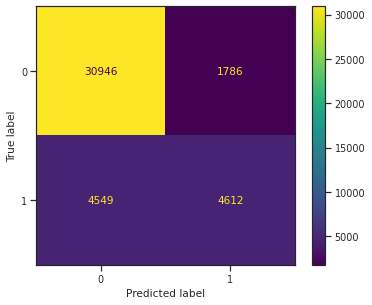

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot()
plt.show()

La matriz de confusion nos muestra nuestros $tp$ (verdaderos positivos, arriba a la izquierda), $fp$ (falsos positivos, abajo a la izquierda), $tn$ (verdaderos negativos, abajo a la derecha) y $fn$ (falsos negativos, arriba a la derecha) en una matriz.

En este caso, la tendencia del modelo es que tiende a predecir 0 sobre 1 porque si vemos la otra diagonal (la de "pifiadas") vemos que hay más casos de era 1 y lo predijo como 0, respecto de era 0 y lo predijo como 1. Por otro lado, la diagonal principal, es "saludable", pues hay una diferencia muy alta entre los casos en los que era 0 y predijo 0 respecto de los de la otra diagonal y lo mismo ocurrió en los casos en los que era 1 y predijo 1 pero con una diferencia no tan notoria. 

El modelo predijo bien más positivos (35495 casos, 84,73%) que negativos (6398 casos, 15,27%) porque hay una gran cantidad de verdaderos positivos y (en menor medida) falsos positivos, mientras que los verdaderos negativos y falsos negativos hay menos.

## Predicciones

Dado que salvo en uno de los folds, en el resto de ellos se obtuvo mejor score del auc con Hashing trick que en Binary encoding; el ganador para hacer la predicción es el modelo de esta sección (el mejor modelo de su mismo tipo).

In [ ]:
hamburguesas_test_ohe = preprocessing_knn_imputer_robust_escaler_one_hot_encoding_hashing_trick(
    None,
    None,
    None,
    hamburguesas_test,

In [ ]:
predicciones = modelo.predict(hamburguesas_test_ohe)

In [ ]:
auxiliar = hamburguesas_test.join(hamburguesas_target).reset_index()
auxiliar = auxiliar[['id', 'llovieron_hamburguesas_al_dia_siguiente']]
auxiliar = auxiliar.set_index('id')

In [ ]:
nuestra_prediccion = pd.DataFrame(data=predicciones, columns=auxiliar.columns, index=auxiliar.index)

In [ ]:
for v in nuestra_prediccion.columns:
  nuestra_prediccion.loc[:, v] = nuestra_prediccion[v].map({0: 'no', 1: 'si',})

In [ ]:
nuestra_prediccion.to_csv('XGBoost_knn_imputer_robust_escaler_one_hot_encoding_hashing_trick.csv')

In [ ]:
nuestra_prediccion.to_csv('/drive/My Drive/TP_Datos_2C2021/parte_2/XGBoost.csv')

# Mean imputer, standar scaler, one hot encoding y binary encoding

In [ ]:
hamburguesas_train_values_bin, hamburguesas_val_dev_values_bin, X_test_holdout_sn = preprocessing_mean_imputer_standar_escaler_one_hot_encoding_binary_encoding(
    X_train, 
    X_val_dev, 
    X_test_holdout
)

hamburguesas_train_target_enc = y_train['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})
hamburguesas_val_dev_target_enc = y_val_dev['llovieron_hamburguesas_al_dia_siguiente'].map({'no': 0, 'si': 1, np.NaN: 0})

## Selección de features

In [ ]:
modelo = XGBClassifier()
modelo.fit(hamburguesas_train_values_bin, hamburguesas_train_target_enc)

[17:08:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
importancia = []
for i in range (len(modelo.feature_importances_)):
  importancia.append((modelo.feature_importances_[i], hamburguesas_train_values_bin.columns[i]))

In [ ]:
importancia.sort(reverse=True)
importancia

[(0.18901691, 'humedad_tarde'),
 (0.041785985, 'rafaga_viento_max_velocidad'),
 (0.03711973, 'horas_de_sol'),
 (0.03258285, 'nubosidad_tarde'),
 (0.029325513, 'mm_lluvia_dia'),
 (0.027020514, 'presion_atmosferica_temprano'),
 (0.016574595, 'mes'),
 (0.0152434455, 'presion_atmosferica_tarde'),
 (0.015183459, 'rafaga_viento_max_direccion_Noreste'),
 (0.014435604, 'temp_max'),
 (0.013943291, 'rafaga_viento_max_direccion_Este'),
 (0.013817117, 'direccion_viento_tarde_Sursuroeste'),
 (0.013549162, 'velocidad_viendo_tarde'),
 (0.013533298, 'rafaga_viento_max_direccion_Oeste'),
 (0.013356597, 'temperatura_temprano'),
 (0.013288351, 'temperatura_tarde'),
 (0.013282294, 'rafaga_viento_max_direccion_Noroeste'),
 (0.013096754, 'nubosidad_temprano'),
 (0.013070272, 'direccion_viento_tarde_Sursureste'),
 (0.012761935, 'humedad_temprano'),
 (0.012484025, 'direccion_viento_temprano_Nornoreste'),
 (0.012455946, 'temp_min'),
 (0.012186382, 'rafaga_viento_max_direccion_Sur'),
 (0.012185558, 'velocidad_v

In [ ]:
aux = importancia[:9] #puede variar
columnas_a_usar = []
for tupla in aux:
  columnas_a_usar.append(tupla[1])

Esto es para KNN ya que ese modelo no es lo suficientemente inteligente para saber a qué columnas le debe dar más imporatancia

In [ ]:
columnas_a_usar

['humedad_tarde',
 'rafaga_viento_max_velocidad',
 'horas_de_sol',
 'nubosidad_tarde',
 'mm_lluvia_dia',
 'presion_atmosferica_temprano',
 'mes',
 'presion_atmosferica_tarde',
 'rafaga_viento_max_direccion_Noreste']

## Búsqueda de hiperparámetros

In [ ]:
modelo = XGBClassifier()

n_estimators = [50, 80]
max_depth = [7,10]
min_samples_split = [200, 250]
min_samples_leaf = [30, 50]
max_features = [7, 15]
learning_rate = [0.01, 0.1, 0.5]

XGB_hyperparameters = dict(n_estimators=n_estimators,
                            max_depth=max_depth,
                            learning_rate=learning_rate,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features)

In [ ]:
XGB_hyperparameters

{'n_estimators': [50, 80],
 'max_depth': [7, 10],
 'learning_rate': [0.01, 0.1, 0.5],
 'min_samples_split': [200, 250],
 'min_samples_leaf': [30, 50],
 'max_features': [7, 15]}

In [ ]:
xgbsearch = GridSearchCV(estimator=modelo, param_grid=XGB_hyperparameters, cv=5, verbose=4, scoring='roc_auc')
xgbsearch.fit(hamburguesas_train_values_bin, hamburguesas_train_target_enc)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[18:01:16] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:01:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.853 total time=   3.3s
[18:01:19] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not b

[CV 1/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.853 total time=   2.7s
[18:01:53] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:01:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.853 total time=   2.7s
[18:01:56] WARNING: ../src/learner

[18:02:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.853 total time=   5.3s
[18:02:48] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:02:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 2/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.853 total time=   2.7s
[18:03:30] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:03:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.01, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.851 total time=   2.8s
[18:03:33] WARNING: ../src/learner

[CV 3/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.851 total time=   2.7s
[18:04:32] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:04:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.853 total time=   2.7s
[18:04:35] WARNING: ../src/learn

[18:05:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.853 total time=   5.0s
[18:05:27] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:05:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

[CV 4/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.853 total time=   2.7s
[18:06:10] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:06:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.855 total time=   4.3s
[18:06:15] WARNING: ../src/learn

[CV 5/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.855 total time=   2.5s
[18:07:15] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:07:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.856 total time=   4.1s
[18:07:19] WARNING: ../src/learn

[18:08:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.862 total time=  12.8s
[18:08:30] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:08:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

[CV 1/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.862 total time=  13.2s
[18:09:52] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:09:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.861 total time=   8.6s
[18:10:01] WARNING: ../src/learn

[18:11:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.861 total time=   9.4s
[18:11:25] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:11:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

[CV 2/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.861 total time=   6.7s
[18:12:59] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:12:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.01, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.858 total time=   6.7s
[18:13:05] WARNING: ../src/learn

[CV 3/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.858 total time=   6.7s
[18:14:28] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:14:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.861 total time=  13.2s
[18:14:41] WARNING: ../src/lea

[18:15:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.861 total time=  14.1s
[18:16:10] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

[CV 4/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.861 total time=  14.2s
[18:17:35] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:17:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.860 total time=  13.1s
[18:17:48] WARNING: ../src/lea

[18:18:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.860 total time=  13.3s
[18:19:11] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:19:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

[CV 5/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.872 total time=   4.1s
[18:20:01] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:20:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.870 total time=   2.7s
[18:20:03] WARNING: ../src/learner.c

[CV 1/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.870 total time=   2.5s
[18:21:11] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:21:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.871 total time=   2.5s
[18:21:13] WARNING: ../src/learner.c

[18:22:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.871 total time=   5.4s
[18:22:06] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

[CV 2/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.871 total time=   2.7s
[18:22:51] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.868 total time=   2.7s
[18:22:53] WARNING: ../src/learner

[CV 3/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.868 total time=   2.5s
[18:23:56] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.870 total time=   2.6s
[18:23:59] WARNING: ../src/learner

[18:24:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.870 total time=   5.1s
[18:24:51] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:24:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 4/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.870 total time=   2.7s
[18:25:36] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:25:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.871 total time=   2.7s
[18:25:39] WARNING: ../src/learner

[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.872 total time=   4.1s
[18:26:47] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:26:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.874 total time=   6.3s
[18:26:53] WARNING: ../src/learner

[CV 1/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.874 total time=   6.3s
[18:28:12] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:28:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.875 total time=   6.2s
[18:28:18] WARNING: ../src/learner

[18:29:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.875 total time=   8.7s
[18:29:42] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 2/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.875 total time=  13.0s
[18:32:41] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:32:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.873 total time=  42.9s
[18:33:24] WARNING: ../src/learner

[18:35:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.873 total time=   7.6s
[18:35:32] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:35:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

[CV 3/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.873 total time=  20.3s
[18:38:15] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:38:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.872 total time=  11.3s
[18:38:26] WARNING: ../src/learn

[CV 4/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.872 total time=   9.8s
[18:40:14] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:40:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.874 total time=  12.7s
[18:40:27] WARNING: ../src/learn

[CV 5/5] END learning_rate=0.1, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.874 total time=  11.5s
[18:41:44] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:41:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.863 total time=   5.0s
[18:41:49] WARNING: ../src/learner

[CV 1/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.863 total time=   2.5s
[18:42:42] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:42:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.865 total time=   2.5s
[18:42:45] WARNING: ../src/learner.c

[18:43:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.865 total time=   4.8s
[18:43:37] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:43:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

[CV 2/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.865 total time=   2.6s
[18:44:20] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=7, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.863 total time=   2.6s
[18:44:22] WARNING: ../src/learner.c

[18:45:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.863 total time=   4.8s
[18:45:24] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:45:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 3/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.863 total time=   4.9s
[18:46:04] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:46:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=50;, score=0.863 total time=   5.4s
[18:46:09] WARNING: ../src/learner

[CV 4/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.863 total time=   2.5s
[18:47:02] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:47:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=50;, score=0.862 total time=   2.5s
[18:47:04] WARNING: ../src/learner

[18:48:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=7, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.862 total time=   4.7s
[18:48:14] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:48:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 5/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=50;, score=0.854 total time=   7.6s
[18:49:06] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:49:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.858 total time=  11.6s
[18:49:17] WARNING: ../src/learner

[18:50:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.858 total time=  18.4s
[18:50:41] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:50:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

[CV 1/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.858 total time=  11.9s
[18:52:49] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:52:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.859 total time=   6.4s
[18:52:55] WARNING: ../src/learner

[CV 2/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.859 total time=   6.0s
[18:54:25] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:54:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=10, max_features=7, min_samples_leaf=50, min_samples_split=250, n_estimators=80;, score=0.860 total time=   6.1s
[18:54:31] WARNING: ../src/learner

[CV 3/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.860 total time=   6.1s
[18:55:47] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:55:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=200, n_estimators=80;, score=0.860 total time=   6.0s
[18:55:53] WARNING: ../src/learn

[CV 4/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.860 total time=   6.1s
[18:57:09] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:57:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=30, min_samples_split=250, n_estimators=80;, score=0.854 total time=   6.1s
[18:57:15] WARNING: ../src/learn

[CV 5/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=80;, score=0.854 total time=   6.1s
[18:58:38] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:58:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=10, max_features=15, min_samples_leaf=50, min_samples_split=250, n_estimators=50;, score=0.858 total time=   6.3s
[18:58:44] WARNING: ../src/learn

[18:59:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [ ]:
parametros = xgbsearch.best_params_
parametros

{'learning_rate': 0.1,
 'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 30,
 'min_samples_split': 200,
 'n_estimators': 80}

 * learning_rate = 0.1
 * max_depth = 10
 * max_features = 7
 * min_samples_leaf = 30
 * min_samples_split = 200
 * n_estimators = 80

Como ya encontramos los mejores hiperparámetros, creamos un diccionario con dichos valores (esto es para cuando no podamos hacer el `.best_params_` porque no ejecutamos GridSearch cuando usamos el notebook otro día debido al tiempo que insume)

## Entrenamos y vemos cómo nos va

Hay un bug, por eso falta el feature `barrio_4`en `hamburguesas_val_dev_values_bin`, por lo que agreagamos ese feature en dicho dataset

In [ ]:
hamburguesas_val_dev_values_bin['barrio_4'] = hamburguesas_train_values_bin['barrio_4']

In [ ]:
parametros = {'learning_rate': 0.1,
              'max_depth': 10,
              'max_features': 7,
              'min_samples_leaf': 30,
              'min_samples_split': 200,
              'n_estimators': 80}

In [ ]:
modelo = XGBClassifier(**parametros)
modelo.fit(hamburguesas_train_values_bin, hamburguesas_train_target_enc)

[19:45:12] WARNING: ../src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:45:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, max_features=7, min_child_weight=1,
              min_samples_leaf=30, min_samples_split=200, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [ ]:
prediccion = modelo.predict_proba(hamburguesas_val_dev_values_bin)[:,1]

In [ ]:
roc_auc_score(hamburguesas_val_dev_target_enc, prediccion)

0.8715561298691621

In [ ]:
prediccion = modelo.predict(hamburguesas_val_dev_values_bin)

In [ ]:
accuracy_score(hamburguesas_val_dev_target_enc, prediccion)

0.8508103979185067

In [ ]:
recall_score(hamburguesas_val_dev_target_enc, prediccion)

0.5002728959720555

In [ ]:
precision_score(hamburguesas_val_dev_target_enc, prediccion)

0.7326938449240608

In [ ]:
f1_score(hamburguesas_val_dev_target_enc, prediccion)

0.5945770627919045

In [ ]:
cm = confusion_matrix(hamburguesas_val_dev_target_enc, prediccion)
{'tn': cm[0, 0], 'fp': cm[0, 1],
'fn': cm[1, 0], 'tp': cm[1, 1]}

{'tn': 31060, 'fp': 1672, 'fn': 4578, 'tp': 4583}

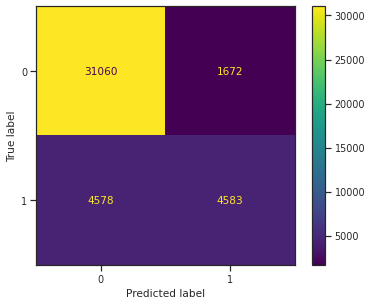

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot()
plt.show()

En este caso, la tendencia del modelo es que tiende a predecir 0 sobre 1 porque si vemos la otra diagonal (la de "pifiadas") vemos que hay más casos de era 1 y lo predijo como 0, respecto de era 0 y lo predijo como 1. Por otro lado, la diagonal principal, es "saludable", pues hay una diferencia muy alta entre los casos en los que era 0 y predijo 0 respecto de los de la otra diagonal y lo mismo ocurrió en los casos en los que era 1 y predijo 1 pero con una diferencia no tan notoria. 

El modelo predijo bien más positivos (35638 casos, 85,07%) que negativos (6255 casos, 14,93%) porque hay una gran cantidad de verdaderos positivos y (en menor medida) falsos positivos, mientras que los verdaderos negativos y falsos negativos hay menos.

## Predicciones

In [ ]:
hamburguesas_test_ohe = preprocessing_mean_imputer_standar_escaler_one_hot_encoding_binary_encoding(
    None,
    None,
    None,
    hamburguesas_test,
    True)

In [ ]:
predicciones = modelo.predict(hamburguesas_test_ohe)

In [ ]:
auxiliar = hamburguesas_test.join(hamburguesas_target).reset_index()
auxiliar = auxiliar[['id', 'llovieron_hamburguesas_al_dia_siguiente']]
auxiliar = auxiliar.set_index('id')

In [ ]:
nuestra_prediccion = pd.DataFrame(data=predicciones, columns=auxiliar.columns, index=auxiliar.index)

In [ ]:
for v in nuestra_prediccion.columns:
  nuestra_prediccion.loc[:, v] = nuestra_prediccion[v].map({0: 'no', 1: 'si',})

In [ ]:
nuestra_prediccion.to_csv('XGBoost_mean_imputer_standar_escaler_one_hot_encoding_binary_encoding.csv')

In [ ]:
nuestra_prediccion.to_csv('/drive/My Drive/TP_Datos_2C2021/parte_2/XGBoost.csv')